In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
fte = []
for x in range(1,11):
    filename = 'task_'+str(x)+'_accuracies_FTE.pickle'
    fte_acc = unpickle(filename)
    fte.append((1-fte_acc[0])/(1-fte_acc[-1]))
#print(fte)

In [4]:
bte = []
te = []
acc = []
for x in range(1,11):
    filename = 'task_'+str(x)+'_accuracies_BTE.pickle'
    bte_acc = unpickle(filename)
    acc.append(bte_acc)
    calc_bte = (1-bte_acc[0])/([1-a for a in bte_acc])
    bte.append(calc_bte)
    te.append([fte[x-1]*a for a in calc_bte])
#print(bte)
#print(te)
#print(acc)

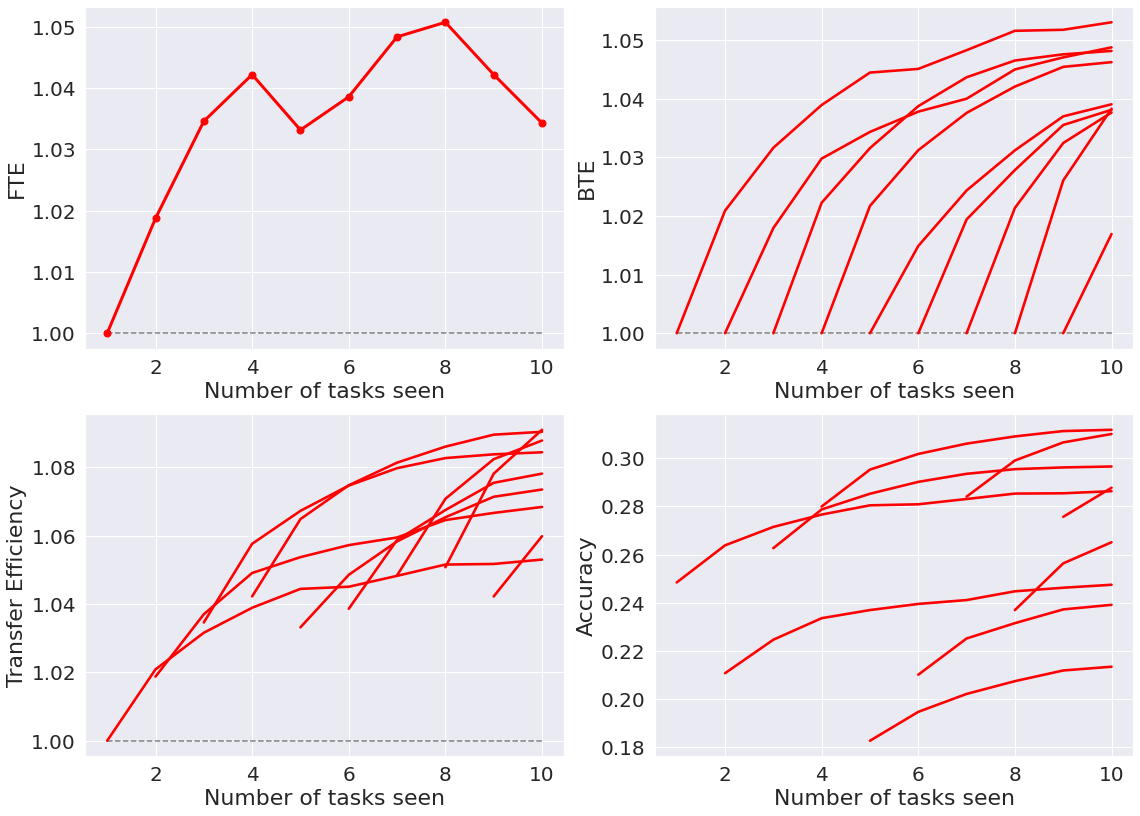

In [5]:
sns.set()

n_tasks=10
clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#CCCC00"]
#c = sns.color_palette(clr, n_colors=len(clr))

fontsize=22
ticksize=20

# Plot FTE

fig, ax = plt.subplots(2,2, figsize=(16,11.5))
#fig.suptitle('ntrees = '+str(ntrees),fontsize=25)
ax[0][0].plot(np.arange(1,n_tasks+1), fte, c='red', marker='.', markersize=14, linewidth=3)
ax[0][0].hlines(1, 1,n_tasks, colors='grey', linestyles='dashed',linewidth=1.5)
ax[0][0].tick_params(labelsize=ticksize)
ax[0][0].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[0][0].set_ylabel('FTE', fontsize=fontsize)

# Plot BTE

for i in range(n_tasks):

    et = np.asarray(bte[i])

    ns = np.arange(i + 1, n_tasks + 1)
    ax[0][1].plot(ns, et, c='red', linewidth = 2.6)
    
ax[0][1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[0][1].set_ylabel('BTE', fontsize=fontsize)
#ax[0][1].set_xticks(np.arange(1,10))
ax[0][1].tick_params(labelsize=ticksize)
ax[0][1].hlines(1, 1,n_tasks, colors='grey', linestyles='dashed',linewidth=1.5)

# Plot TE

for i in range(n_tasks):

    et = np.asarray(te[i])

    ns = np.arange(i + 1, n_tasks + 1)
    ax[1][0].plot(ns, et, c='red', linewidth = 2.6)
    
ax[1][0].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1][0].set_ylabel('Transfer Efficiency', fontsize=fontsize)
#ax[1][0].set_xticks(np.arange(1,10))
ax[1][0].tick_params(labelsize=ticksize)
ax[1][0].hlines(1, 1,n_tasks, colors='grey', linestyles='dashed',linewidth=1.5)

# Plot accuracy

for i in range(n_tasks):
    acc_p = np.asarray(acc[i])
    ns = np.arange(i + 1, n_tasks + 1)

    ax[1][1].plot(ns, acc_p , c='red', linewidth = 2.6)
            
#ax[1][1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
ax[1][1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1][1].set_ylabel('Accuracy', fontsize=fontsize)
#ax[1][1].set_yticks([.4,.6,.8,.9,1, 1.1,1.2])
#ax[1][1].set_xticks(np.arange(1,10))
#ax[1][1].set_ylim(0.89, 1.15)
ax[1][1].tick_params(labelsize=ticksize)

plt.savefig('final_fte_bte_fig.pdf',dpi=300)